In [200]:
import pandas as pd

df=pd.read_csv('Olympic_Athlete_Event_Results.csv',encoding='ISO-8859-1',on_bad_lines='skip')

print("First few rows of the dataset:")
display(df.head())

print("Dataset Information:")
df.info()

print("Missing Values Count:")
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

print("Statistical Summary for Numerical Colums:")
display(df.describe())

# Displaying basic statistical summary for categorical columns (like 'Event', 'Medal', etc.)
print("\nUnique Values in Each Column:")
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].nunique()} unique values")
    
# Check for unique categories in key columns (like 'Medal', 'Sport', etc.)
print("\nUnique Categories in Key Columns:")
print("Medal:", df['Medal'].unique())
print("Sport:", df['Sport'].unique())
print("Country:", df['Country'].unique())


C:\Users\Prathamesh Jadhav\AppData\Local\Temp\ipykernel_19552\2916679188.py:3: DtypeWarning: Columns (16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Olympic_Athlete_Event_Results.csv',encoding='ISO-8859-1',on_bad_lines='skip')


First few rows of the dataset:


,Games,edition_id,NOC,Sport,Event,result_id,Name,athlete_id,pos,Medal,isTeamSport,Height,Weight,Born,Country,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1972 Summer Olympics,18,BEN,Athletics,"400 metres, Men",61050.0,Ibrahima Idrissou,65351,6 h7 r1/4,NaN,FALSE,NaN,NaN,01-01-1940,Benin,NaN,NaN,NaN,NaN
1,1972 Summer Olympics,18,BEN,Athletics,"Triple Jump, Men",61226.0,Christoph Chodaton,923484,DNS,NaN,FALSE,NaN,NaN,NaN,Benin,NaN,NaN,NaN,NaN
2,1972 Summer Olympics,18,BEN,Boxing,"Light-Flyweight, Men",24001.0,Meriga Salou Seriki,1692,17,NaN,FALSE,157,48,08-04-1953,Benin,NaN,NaN,NaN,NaN
3,1972 Summer Olympics,18,BEN,Boxing,"Bantamweight, Men",24081.0,Leopold Agbazo,1691,33,NaN,FALSE,159,54,25-01-1945,Benin,NaN,NaN,NaN,NaN
4,1972 Summer Olympics,18,BIZ,Shooting,"Free Pistol, 50 metres, Open",51723.0,Owen Phillips,41408,59,NaN,FALSE,175,76,09-07-2006,Belize,NaN,NaN,NaN,NaN


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213231 entries, 0 to 213230
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Games        212845 non-null  object 
 1   edition_id   213143 non-null  object 
 2   NOC          212794 non-null  object 
 3   Sport        211824 non-null  object 
 4   Event        213120 non-null  object 
 5   result_id    212952 non-null  float64
 6   Name         212971 non-null  object 
 7   athlete_id   211298 non-null  object 
 8   pos          204267 non-null  object 
 9   Medal        35908 non-null   object 
 10  isTeamSport  208593 non-null  object 
 11  Height       186134 non-null  object 
 12  Weight       186809 non-null  object 
 13  Born         208916 non-null  object 
 14  Country      200180 non-null  object 
 15  Unnamed: 15  230 non-null     object 
 16  Unnamed: 16  5 non-null       object 
 17  Unnamed: 17  3 non-null       object 
 18  Unn

Games             386
edition_id         88
NOC               437
Sport            1407
Event             111
result_id         279
Name              260
athlete_id       1933
pos              8964
Medal          177323
isTeamSport      4638
Height          27097
Weight          26422
Born             4315
Country         13051
Unnamed: 15    213001
Unnamed: 16    213226
Unnamed: 17    213228
Unnamed: 18    213230
dtype: int64

Statistical Summary for Numerical Colums:


,result_id
count,2.129520e+05
mean,2.153281e+06
std,5.697547e+06
min,4.000000e+01
25%,2.969300e+04
50%,7.060500e+04
75%,3.223090e+05
max,9.001677e+07



Unique Values in Each Column:
Games: 413 unique values
edition_id: 798 unique values
NOC: 424 unique values
Sport: 75 unique values
Event: 532 unique values
Name: 103903 unique values
athlete_id: 101091 unique values
pos: 1537 unique values
Medal: 77 unique values
isTeamSport: 80 unique values
Height: 218 unique values
Weight: 3722 unique values
Born: 22899 unique values
Country: 306 unique values
Unnamed: 15: 28 unique values
Unnamed: 16: 4 unique values
Unnamed: 17: 2 unique values
Unnamed: 18: 1 unique values

Unique Categories in Key Columns:
Medal: [nan 'FALSE' 'TRUE' 'Silver' 'Bronze' 'Gold' '19' '47' '7' '2' '1' '4'
 '51722' '5' '32' '=66 r1/1' '=51 r1/1' '53 r1/1' '17' '16' '12' '6' '3'
 'DNF' '10' '8' '20' '11' 'AC' '29' '14' 'DQ' '7 h11 r1/4' '8 h8 r1/4'
 'Francisco Garcl62088' '25' '26' '23' '36' '22' '3 h2 r2/4' '58 r1/2' '9'
 'Fernando Lez62756' '13' '44' '35' '27' '50' '28' '34' '56' '7 h3 r1/4'
 '15 h2 r1/2' '38' '18' '7 h2 r1/4' 'DNS' '8 h4 r1/3' '33'
 'Armands B\x13rz

In [201]:
print(df.shape)

(213231, 19)


In [202]:
## As we can see that there are some misalignment in dataset 
## the first task is to solve the misalignment problem by deleting those rows

## step 1: Drop rows where in column isTeamsport contain value other than true or false 
# Drop rows where 'isTeamSport' is not exactly True or False
df_cleaned = df[df['isTeamSport'].isin(['TRUE','FALSE'])]
print(df_cleaned.shape)

print("Droping Unamed Columns .")
df_cleaned = df_cleaned.drop(columns=[col for col in df.columns if 'Unnamed' in col])

print(df_cleaned.shape)

## Droping rows with missing value of pos and country 
df_cleaned = df_cleaned.dropna(subset=['pos', 'Country','Born'])

## Checking the missing values
print("Missing Values Count:")
missing_values = df_cleaned.isnull().sum()
print(missing_values)

# Displaying basic statistical summary for categorical columns (like 'Event', 'Medal', etc.)
print("\nUnique Values in Each Column:")
for column in df_cleaned.select_dtypes(include='object').columns:
    print(f"{column}: {df_cleaned[column].nunique()} unique values")
print(df_cleaned.shape)
# Check for unique categories in key columns (like 'Medal', 'Sport', etc.)
print("\nUnique Categories in Key Columns:")
print("Medal:", df_cleaned['Medal'].unique())
print("Sport:", df_cleaned['Sport'].unique())
print("Country:", df_cleaned['Country'].unique())
print("Edition ID:", df_cleaned['edition_id'].unique())
print("Athlete ID:", df_cleaned['athlete_id'].unique())
print("Height:", df_cleaned['Height'].unique())
print("Weight:", df_cleaned['Weight'].unique())


(201809, 19)
Droping Unamed Columns .
(201809, 15)
Missing Values Count:
Games               0
edition_id          0
NOC                 0
Sport               0
Event               0
result_id           0
Name                0
athlete_id          0
pos                 0
Medal          171518
isTeamSport         0
Height          21504
Weight          21504
Born                0
Country             0
dtype: int64

Unique Values in Each Column:
Games: 27 unique values
edition_id: 27 unique values
NOC: 216 unique values
Sport: 70 unique values
Event: 490 unique values
Name: 98206 unique values
athlete_id: 98597 unique values
pos: 1374 unique values
Medal: 3 unique values
isTeamSport: 2 unique values
Height: 94 unique values
Weight: 505 unique values
Born: 22703 unique values
Country: 204 unique values
(199419, 15)

Unique Categories in Key Columns:
Medal: [nan 'Silver' 'Bronze' 'Gold']
Sport: ['Athletics' 'Boxing' 'Shooting' 'Weightlifting' 'Cycling Road'
 'Cycling Track' 'Wrestling' 'Swi

In [203]:
## As we can see there in some rows range of weight is given and the dtype of weight and height is object we will convert 
## it into numerict value
def clean_and_convert(column):
    def convert_range(value):
        # Ensure the value is treated as a string
        value = str(value)
        if '-' in value:  # Check for a range
            low, high = map(float, value.split('-'))
            return (low + high) / 2
        elif value.replace('.', '', 1).isdigit():  # Check if it’s a single numeric value
            return float(value)
        return None  # For values that cannot be converted

    # Apply the function and convert to numeric
    return pd.to_numeric(column.apply(convert_range), errors='coerce')

# Apply the function to 'Height' and 'Weight' columns
df_cleaned['Height'] = clean_and_convert(df_cleaned['Height'])
df_cleaned['Weight'] = clean_and_convert(df_cleaned['Weight'])

## Cheking unique value in weight and height
print("Height:", df_cleaned['Height'].unique())
print("Weight:", df_cleaned['Weight'].unique())

print("Dataset Information:")
df_cleaned.info()

Height: [ nan 157. 159. 175. 181. 167. 155. 168. 185. 170. 173. 166. 147. 160.
 165. 180. 171. 153. 183. 172. 163. 176. 184. 169. 177. 178. 182. 162.
 174. 158. 156. 195. 164. 150. 152. 139. 186. 161. 154. 179. 189. 187.
 191. 194. 190. 192. 193. 151. 188. 197. 196. 198. 204. 200. 201. 206.
 212. 213. 148. 130. 199. 132. 202. 145. 208. 203. 210. 216. 207. 205.
 209. 149. 223. 143. 136. 146. 218. 137. 142. 220. 140. 144. 141. 135.
 214. 138. 211. 217. 127. 128. 221. 215. 226. 219. 133.]
Weight: [  nan  48.   54.   76.   80.   61.   55.   68.   73.   75.   85.   84.
  56.   63.   52.   87.   67.   57.   65.   74.   70.   64.   58.   71.
  59.   60.   77.   95.   62.   86.   78.   81.   69.   72.   90.   88.
  53.   83.   51.   46.   50.   66.   44.   79.   47.   82.  116.  104.
 118.  105.  120.  112.   92.   93.   49.  103.   91.   94.   89.  108.5
 146.5 106.  100.  110.  125.   97.  113.   42.   98.   45.  109.   99.
 121.  140.   96.  114.  126.  123.  161.  128.  107.   63.5 108.  1

In [204]:
# Missing Data Handling.
missing_data_percentage = (df_cleaned.isnull().sum() / len(df)) * 100
print("Missing Data Percentage in each Column:\n", missing_data_percentage)

Missing Data Percentage in each Column:
 Games           0.000000
edition_id      0.000000
NOC             0.000000
Sport           0.000000
Event           0.000000
result_id       0.000000
Name            0.000000
athlete_id      0.000000
pos             0.000000
Medal          80.437647
isTeamSport     0.000000
Height         10.084838
Weight         10.103597
Born            0.000000
Country         0.000000
dtype: float64


In [205]:
## Cleaning the data and handling missing values 

## replacing the nan value in height and weight with median according to there sports
# Group by 'Sport' and calculate the median height for each sport
median_height_by_sport = df_cleaned.groupby('Sport')['Height'].transform('median')

# Replace NaN values in 'Height' with the median height of their respective sport
df_cleaned['Height'].fillna(median_height_by_sport)

# Group by 'Sport' and calculate the median weight for each sport
median_weight_by_sport = df_cleaned.groupby('Sport')['Weight'].transform('median')

# Replace NaN values in 'Weight' with the median weight of their respective sport
df_cleaned['Weight'].fillna(median_weight_by_sport)

## Replacing the nan value in medal with no Medal
df_cleaned['Medal'] = df_cleaned['Medal'].fillna('No Medal')

## Checking nan value
print(df_cleaned.isnull().sum())


Games              0
edition_id         0
NOC                0
Sport              0
Event              0
result_id          0
Name               0
athlete_id         0
pos                0
Medal              0
isTeamSport        0
Height         21504
Weight         21544
Born               0
Country            0
dtype: int64


In [206]:
df_cleaned=df_cleaned.dropna(subset=['Height','Weight'])
print(df_cleaned.isnull().sum())
print(df_cleaned.shape)

# Save the cleaned DataFrame
df_cleaned.to_csv('Cleaned_Olympic_Athlete_Event_Results.csv', index=False)


Games          0
edition_id     0
NOC            0
Sport          0
Event          0
result_id      0
Name           0
athlete_id     0
pos            0
Medal          0
isTeamSport    0
Height         0
Weight         0
Born           0
Country        0
dtype: int64
(177875, 15)


In [209]:
## addig new column in dataframe 
## Adding age of an athelete and and bmi from height and weight

## Age
# Step 1: Extract the Olympic year
df_cleaned['Olympic_Year'] = df_cleaned['Games'].str.extract(r'(\d{4})')[0].astype(float)

# Step 2: Clean and convert the 'Born' column to datetime
df_cleaned['Born'] = pd.to_datetime(df_cleaned['Born'], format='%d-%m-%Y', errors='coerce')

# Step 3: Extract the birth year
df_cleaned['Birth_Year'] = df_cleaned['Born'].dt.year.astype(float)

# Step 4: Calculate age by subtracting birth year from Olympic year
df_cleaned['Age'] = df_cleaned['Olympic_Year'] - df_cleaned['Birth_Year']

# BMI
df_cleaned['BMI'] = df_cleaned['Weight'] / ((df_cleaned['Height']/100) ** 2)  # Calculate BMI

print(df_cleaned.head)


<bound method NDFrame.head of                        Games edition_id  NOC      Sport  \
2       1972 Summer Olympics         18  BEN     Boxing   
3       1972 Summer Olympics         18  BEN     Boxing   
4       1972 Summer Olympics         18  BIZ   Shooting   
5       1972 Summer Olympics         18  BIZ   Shooting   
12      1972 Summer Olympics         18  BAR  Athletics   
...                      ...        ...  ...        ...   
213222  2022 Winter Olympics         62  ROU  Bobsleigh   
213223  2022 Winter Olympics         62  GER  Bobsleigh   
213224  2022 Winter Olympics         62  AUT  Bobsleigh   
213228  2022 Winter Olympics         62  KOR  Bobsleigh   
213229  2022 Winter Olympics         62  JAM  Bobsleigh   

                                           Event   result_id  \
2                           Light-Flyweight, Men     24001.0   
3                              Bantamweight, Men     24081.0   
4                   Free Pistol, 50 metres, Open     51723.0   
5    

In [210]:
## Scaling the columns like age,height,weight,and bmi

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the features and create new columns for scaled values
df_cleaned[['Scaled_Height', 'Scaled_Weight', 'Scaled_BMI', 'Scaled_Age']] = scaler.fit_transform(
    df_cleaned[['Height', 'Weight', 'BMI', 'Age']]
)

# Display to confirm new columns are created
print(df_cleaned[['Height','Scaled_Height', 'Weight','Scaled_Weight' ,'BMI','Scaled_BMI','Age', 'Scaled_Age']].head())

df_cleaned.to_csv('Scaled_Olympic_Athlete_Event_Results.csv', index=False)
df_scaled=pd.read_csv('Scaled_Olympic_Athlete_Event_Results.csv')

    Height  Scaled_Height  Weight  Scaled_Weight        BMI  Scaled_BMI   Age  \
2    157.0      -1.739960    48.0      -1.553401  19.473407   -1.100644  19.0   
3    159.0      -1.553261    54.0      -1.144562  21.359915   -0.464774  27.0   
4    175.0      -0.059663    76.0       0.354515  24.816327    0.700250 -34.0   
5    175.0      -0.059663    76.0       0.354515  24.816327    0.700250 -34.0   
12   181.0       0.500436    80.0       0.627075  24.419279    0.566420  28.0   

    Scaled_Age  
2    -1.107720  
3     0.230017  
4    -9.970228  
5    -9.970228  
12    0.397234  


C:\Users\Prathamesh Jadhav\AppData\Local\Temp\ipykernel_19552\112586566.py:17: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_scaled=pd.read_csv('Scaled_Olympic_Athlete_Event_Results.csv')


In [211]:
print("Medal" in df_scaled.columns)

print(df_scaled['Medal'].unique())

True
['No Medal' 'Silver' 'Bronze' 'Gold']


In [212]:
# One-hot encode the Medal column without a prefix and without dropping any columns
medal_dummies = pd.get_dummies(df_scaled['Medal'], drop_first=False)

# Concatenate the dummies with the original dataframe without dropping the original Medal column
df_scaled = pd.concat([df_scaled, medal_dummies], axis=1)

In [214]:
print(df_scaled.columns)

Index(['Games', 'edition_id', 'NOC', 'Sport', 'Event', 'result_id', 'Name',
       'athlete_id', 'pos', 'Medal', 'isTeamSport', 'Height', 'Weight', 'Born',
       'Country', 'Olympic_Year', 'Birth_Year', 'Age', 'BMI', 'Scaled_Height',
       'Scaled_Weight', 'Scaled_BMI', 'Scaled_Age', 'Bronze', 'Gold',
       'No Medal', 'Silver'],
      dtype='object')


In [215]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177875 entries, 0 to 177874
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Games          177875 non-null  object 
 1   edition_id     177875 non-null  int64  
 2   NOC            177875 non-null  object 
 3   Sport          177875 non-null  object 
 4   Event          177875 non-null  object 
 5   result_id      177875 non-null  float64
 6   Name           177875 non-null  object 
 7   athlete_id     177875 non-null  object 
 8   pos            177875 non-null  object 
 9   Medal          177875 non-null  object 
 10  isTeamSport    177875 non-null  bool   
 11  Height         177875 non-null  float64
 12  Weight         177875 non-null  float64
 13  Born           177871 non-null  object 
 14  Country        177875 non-null  object 
 15  Olympic_Year   177875 non-null  float64
 16  Birth_Year     177871 non-null  float64
 17  Age            177871 non-nul

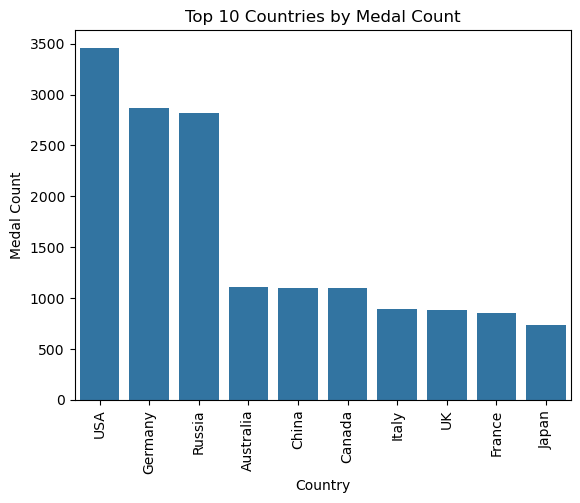

In [218]:
## EDA 
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = df_scaled[df_scaled['Medal'] != 'No Medal']['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=90)
plt.title('Top 10 Countries by Medal Count')
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.show()


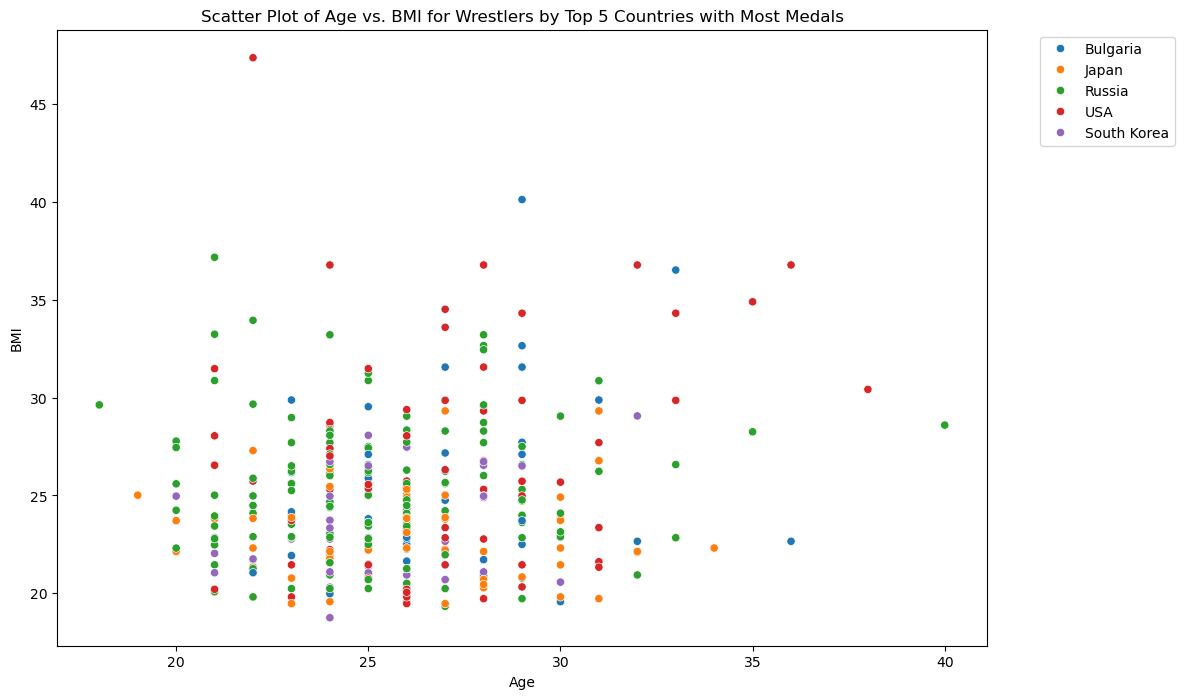

In [220]:
# This graph is to plot Age vs Bmi for wrestler for top 5 countries

# Step 1: Filter data for wrestling and where a medal was won
wrestling_medal_data = df_scaled[(df_scaled['Sport'] == 'Wrestling') & (df_scaled['Medal'] != 'No Medal')]

# Step 2: Get the top 5 countries in wrestling based on the number of medals won
top_5_wrestling_countries = wrestling_medal_data['Country'].value_counts().nlargest(5).index

# Step 3: Filter the original wrestling data to only include these top 5 countries
top_5_wrestling_data = wrestling_medal_data[wrestling_medal_data['Country'].isin(top_5_wrestling_countries)]

# Step 4: Plot Age vs. BMI for wrestlers from the top 5 countries
plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_5_wrestling_data, x='Age', y='BMI', hue='Country', palette='tab10')
plt.title('Scatter Plot of Age vs. BMI for Wrestlers by Top 5 Countries with Most Medals')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## WE can do more Data Visualization Tecnique but there are many countries and many sports so it is not possible to show all tecnique